In [1]:
import numpy as np,matplotlib.pyplot as plt,scipy as sp

In [2]:
#This cell needs user input
#set ic_thermalDiffusivityTest.initialTemperature=lbm.initialTemperature to a value <= 0.03333
#set lbm.nu and lbm.alpha to a value <= 0.0100 to set the desired Prandtl number = nu/alpha
#set ic_thermalDiffusivityTest.meanMolecularMass = lbm.meanMolecularMass = 17.031 [kg/kmol] (e.g. molecular weight of ammonia, 28.96 for air)
#set ic_thermalDiffusivityTest.adiabaticExponent = lbm.adiabaticExponent = 1.32 (e.g. adiabatic exponent of ammonia, 1.4 for air)
#Please refer to the plot at the end of the notebook for a reasoanble range to play with
#Run the marbles code

#Enter the maximum temperature in the domain at each time step in a list called "temperatureMaxList"

meanInitialTemperature=0.003333 #T_0

#nu=0.00000876
#alpha=0.000010
temperatureMaxList=[0.0033330111089260287,0.003333011108338176,0.003333011107781597,0.0033330111072346004,0.0033330111066846944,0.003333011106120858,0.0033330111055466377,0.0033330111049846086,0.0033330111044451555,0.0033330111039127325,0.00333301110337527]

#nu=0.0000876
#alpha=0.00010
#temperatureMaxList=[0.0033330111089260287,0.0033330111033038714,0.0033330110978033434,0.0033330110924156917,0.0033330110870387793,0.0033330110815657367,0.0033330110759895912,0.003333011070392199,0.0033330110648796627,0.003333011059492473,0.003333011054139599]

#nu=0.000876
#alpha=0.0010
#temperatureMaxList=[0.0033330111089260287,0.0033330110527316566,0.0033330109977224424,0.003333010943989307,0.0033330108907816953, 0.0033330108371347118,0.0033330107827006144,0.0033330107280385014,0.0033330106741257482,0.0033330106215165604,0.003333010569870143]

#nu=0.00876
#alpha=0.010
#temperatureMaxList=[0.0033330111089260287,0.0033330105519450933,0.0033330100276789763,0.003333009536056499,0.003333009072522581,0.003333008630668897,0.0033330082055979177,0.0033330077960986204,0.003333007404394945,0.003333007033836297,0.003333006686130709]

#meanInitialTemperature=0.03333

#nu=0.0071
#alpha=0.010
#temperatureMaxList=[0.03340215329014551,0.03339851356944971,0.0333951476904181,0.03339188963009732,0.03338874961475574,0.0333858520511657,0.03338308525571377,0.03338038707464298,0.03337788233695801,0.0333755290937577,0.0333732222571624] 

#nu=0.00071
#alpha=0.0010
#temperatureMaxList=[0.03340215329014551,0.03340179248093723,0.03340144310994365,0.03340108129426548,0.03340073396884571,0.03340038325337785,0.033400029435033916,0.033399689770114024,0.033399337832998297,0.03339899646682287,0.033398657317939374] 

#nu=0.000071
#alpha=0.00010
#temperatureMaxList=[0.03340215329014551,0.03340211693829567,0.03340208164841688,0.03340204518170678,0.033402010440168814,0.03340197416190645,0.033401938698434726,0.03340190352715983,0.033401867134232564,0.03340183247380818,0.033401796309968014] 

#nu=0.0000071
#alpha=0.000010
#temperatureMaxList=[0.03340215329014551,0.03340214928783017,0.03340214552387792,0.033402141875260756,0.03340213863515059,0.03340213461244372,0.033402131449524766,0.03340212768242821,0.03340212403454414,0.03340212079532666,0.033402116773623786] 
    
#nu=0.000010
#alpha=0.000010
#temperatureMaxList=[0.03340874201013944,0.03340873717067321,0.033408733547318936,0.033408729930235956,0.03340872619828263,0.033408722282763176,0.033408718193215704,0.03340871401269121,0.03340870986614099,0.03340870586786155,0.03340870206676039]

#nu=0.00010
#alpha=0.00010
#temperatureMaxList=[0.03340874201013944,0.033408702517069545,0.033408664080927346,0.03340862539812661,0.03340858637224108,0.03340854706797808,0.033408507677263936,0.03340846843598876,0.033408429525490474,0.03340839099314283,0.03340835272588857]

#nu=0.0010
#alpha=0.0010
#temperatureMaxList=[0.03340874201013944,0.033408356815923565,0.033407972788316816,0.03340758769829346,0.03340720172925465,0.03340681627400937,0.03340643330379178,0.03340605451267123,0.033405680580878075,0.03340531086409777,0.03340494366894785]

#nu=0.010
#alpha=0.010
#temperatureMaxList=[0.03340874201013944,0.03340498275468927,0.033401386210898464,0.03339793634852444,0.03339463084356549,0.03339147646793545,0.03338848203037338,0.03338565127375332,0.033382978639401754,0.03338044951061152,0.03337804449187678]

samplingInterval=5000 #The interval between consecutive readings. "max_step" value in the marbles input file

nY=200.0 #wavelength on the sine wave. "ic_viscosityTest.waveLength" in the marbles input file

<class 'numpy.ndarray'> <class 'numpy.ndarray'>
alpha recovered is 1.0202174236998391e-05


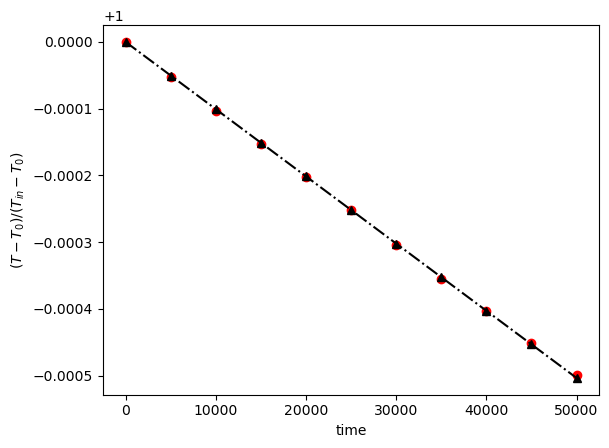

In [3]:
#Execute this cell as is. Prints the recovered thermal diffusivity. Visually check the curve fit 

# viscosity test
from scipy.optimize import curve_fit

temperatureMaxArray=np.asarray(temperatureMaxList)-meanInitialTemperature
temperatureMaxArray[:]=temperatureMaxArray[:]/temperatureMaxArray[0]
tArray=np.arange(len(temperatureMaxList))[:]*samplingInterval

print(type(temperatureMaxArray),type(tArray))

def fit(t_,a_):
    return np.exp(-a_*t_)

popt,pcov=curve_fit(fit,tArray,temperatureMaxArray,p0=0.00000010)

plt.plot(tArray,temperatureMaxArray,'ro')
plt.plot(tArray,fit(tArray,popt[0]),'k-.^')
alphaRecovered=popt[0]/pow((2.0*np.pi/nY),2)
plt.ylabel(r'$(T-T_0)/(T_{in}-T_0)$')
plt.xlabel('time')
print('alpha recovered is',alphaRecovered)

In [4]:
#Some readings taken at various temperatures

#Prandtl 1, gamma=5.0/3.0
alphaInputPr1=[0.000010,0.00010,0.0010,0.010]
alphaRevoveredPr1=[1.0300319369885965e-05,0.00010056444942059138,0.0010031605945491945,0.010024704606597004]

#Prandtl 0.71, gamma=1.4
alphaInputPr0p71=[0.000010,0.00010,0.0010,0.010]
alphaRevoveredPr0p71=[1.0271302677162716e-05,0.00010052321584375431,0.001007166936195215,0.01038101554946801]

#Prandtl 0.876, gamma=1.32
alphaInputPr0p876=[0.010,0.0010,0.00010,0.000010]
alphaRevoveredPr0p876=[0.010271861539354417,0.0010089582673687711,0.00010036837884700615,1.0202174236998391e-05]



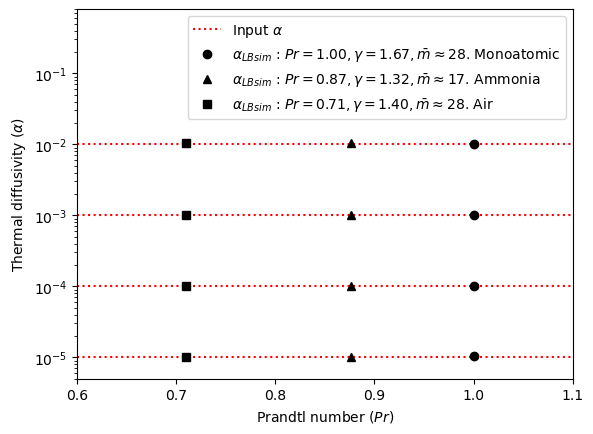

In [5]:
#Plotting

plt.axhline(y=0.000010,linestyle='dotted',color='red')
plt.axhline(y=0.000100,linestyle='dotted',color='red')
plt.axhline(y=0.001000,linestyle='dotted',color='red')
plt.axhline(y=0.010000,linestyle='dotted',color='red',label='Input '+r'$\alpha$')


plt.semilogy(np.ones(4)*1.000,alphaRevoveredPr1,label=r'$\alpha_{LB sim}$ : '+r'$Pr=1.00, \gamma=1.67, \bar{m} \approx 28$'+'. Monoatomic',marker='o',color='k',linestyle='none')
plt.semilogy(np.ones(4)*0.876,alphaRevoveredPr0p876,label=r'$\alpha_{LB sim}$ : '+r'$Pr=0.87, \gamma=1.32, \bar{m} \approx 17$'+'. Ammonia',marker='^',color='k',linestyle='none')
plt.semilogy(np.ones(4)*0.710,alphaRevoveredPr0p71,label=r'$\alpha_{LB sim}$ : '+r'$Pr=0.71, \gamma=1.40, \bar{m} \approx 28$'+'. Air',marker='s',color='k',linestyle='none')


plt.xlabel('Prandtl number '+r'$(Pr)$')
plt.ylabel('Thermal diffusivity '+r'$(\alpha)$')
plt.ylim(5e-6,8e-1)
plt.xlim(0.6,1.1)
plt.legend(loc='best')